<a href="https://colab.research.google.com/github/ThamirisAdriano/iadt-deteccao-anomalias/blob/master/dados_de_anomalias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy matplotlib scikit-learn


###Criação dos Dados
Simula medições de pH normais e adiciona anomalias pontuais para análise.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

np.random.seed(42)
ph_normais = np.random.normal(loc=7.0, scale=0.3, size=100)
anomalias_pontuais = np.array([2.0, 11.0])
dados_ph = np.concatenate([ph_normais, anomalias_pontuais])

###Criando anomalias coletivas

In [ ]:
anomalias_coletivas = np.random.normal(loc=7.7, scale=0.1, size=5)
dados_ph = np.concatenate([dados_ph, anomalias_coletivas])

###Visualização dos Dados
Exibe os dados em um gráfico, destacando os limites esperados.

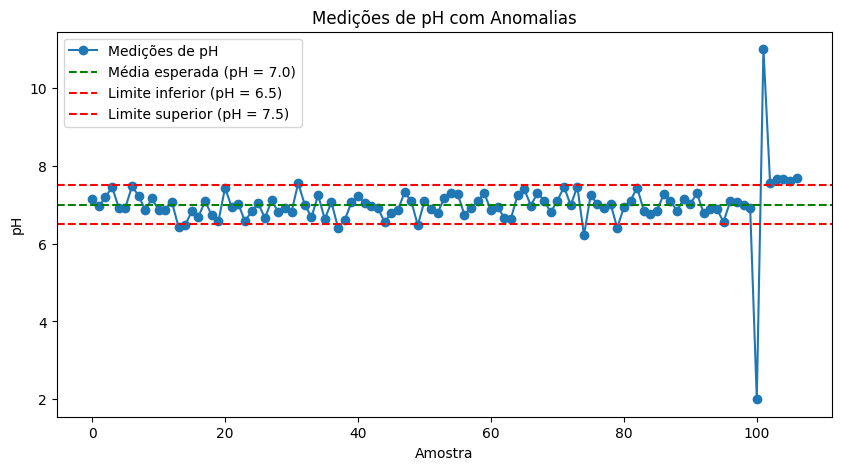

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(dados_ph, marker='o', label='Medições de pH')
plt.axhline(y=7.0, color='g', linestyle='--', label='Média esperada (pH = 7.0)')
plt.axhline(y=6.5, color='r', linestyle='--', label='Limite inferior (pH = 6.5)')
plt.axhline(y=7.5, color='r', linestyle='--', label='Limite superior (pH = 7.5)')
plt.title('Medições de pH com Anomalias')
plt.xlabel('Amostra')
plt.ylabel('pH')
plt.legend()
plt.show()


###Detecção de Anomalias (Estatística Simples)
Define limites baseados em média e desvio padrão, detectando valores fora do intervalo esperado.

In [ ]:
media = np.mean(ph_normais)
desvio_padrao = np.std(ph_normais)
limite_superior = media + 2 * desvio_padrao
limite_inferior = media - 2 * desvio_padrao
anomalias = [(i, valor) for i, valor in enumerate(dados_ph) if valor < limite_inferior or valor > limite_superior]

###Visualização das Anomalias Detectadas
Destaca as anomalias identificadas no gráfico.

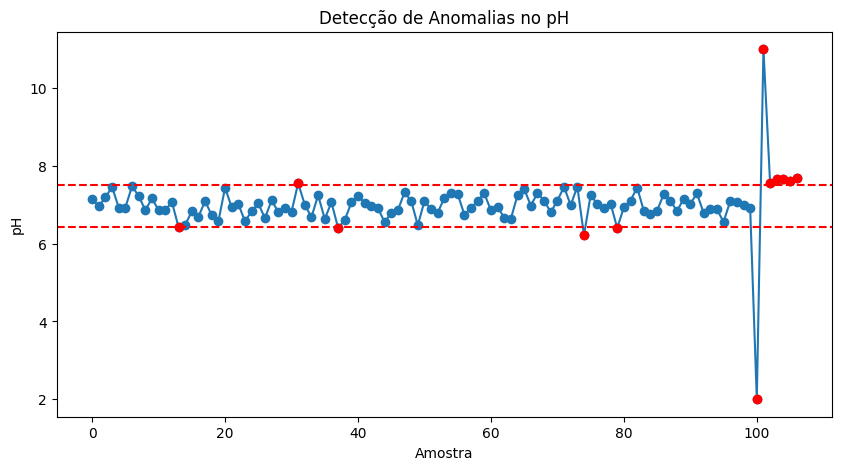

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(dados_ph, marker='o')
for indice, valor in anomalias:
    plt.plot(indice, valor, 'ro')
plt.axhline(y=limite_superior, color='r', linestyle='--')
plt.axhline(y=limite_inferior, color='r', linestyle='--')
plt.title('Detecção de Anomalias no pH')
plt.xlabel('Amostra')
plt.ylabel('pH')
plt.show()


###Detecção de Anomalias com Isolation Forest
Treina o modelo Isolation Forest para identificar anomalias de forma automatizada.

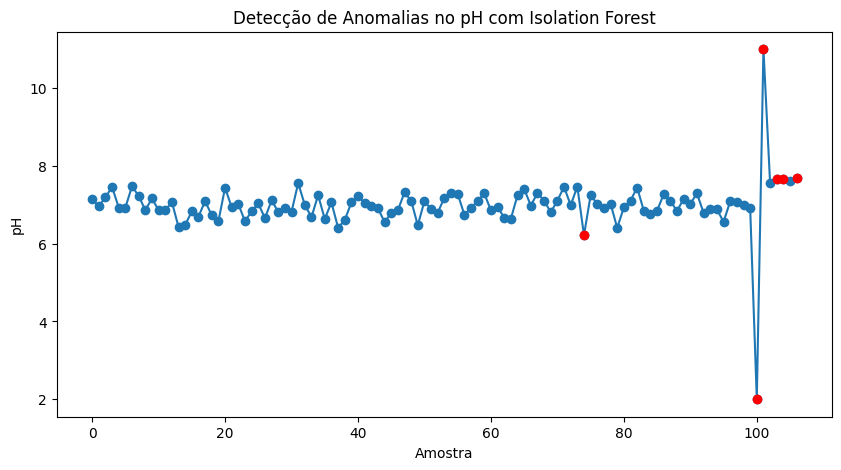

In [ ]:
dados_reshape = dados_ph.reshape(-1, 1)
modelo = IsolationForest(contamination=0.05, random_state=42)
modelo.fit(dados_reshape)
predicoes = modelo.predict(dados_reshape)

plt.figure(figsize=(10, 5))
plt.plot(dados_ph, marker='o')
for i, valor in enumerate(dados_ph):
    if predicoes[i] == -1:
        plt.plot(i, valor, 'ro')
plt.title('Detecção de Anomalias no pH com Isolation Forest')
plt.xlabel('Amostra')
plt.ylabel('pH')
plt.show()